In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import matplotlib.pyplot as plt
import methods
import numpy as np
import matplotlib.cm as cm


In [3]:
# Define the problem (i.e. define the edges of the graph)
nodes = 4
edges = [(0, 1), (0, 3), (0, 2), (1, 2), (1, 3), (2, 3)]

# Known optimal solution:
optimal_cut = [0, 0, 1, 1]
optimal_size = 4

In [4]:
# Define angles, in the form of list of numbers
# For example, if the number of rounds is 1, betas and gammas could be
betas = [0]
gammas = [0]

num_shots = 5000

## `qaoa_anstaz` object
The main class that includes all the methods is the `qaoa_anstaz` class in the `methods` module.
The cell below initializes it and does a noiseless simulation to obtain the distribution of cut sizes, along with various metrics such as the approximation ratio.

While specifying the ansatz, the actual solution (i.e. the maxcut and maxcut size) can be specified using the arguments `optimal_cut` and `optimal_size`. If not provided by the user, the optimal answer is computed using a brute force method (classically).

In [5]:
ansatz = methods.qaoa_anstaz(nodes, edges, betas, gammas, num_shots = num_shots, optimal_cut = optimal_cut, optimal_size =optimal_size) # Initialize and create circuit
ansatz.execute_circuit() #Simulate the circuit and obtain cutsize distribution and various metrics

In [6]:
ansatz.draw_ansatz()

        ┌───┐                        ┌───────┐                           ░ ┌─┐»
   q_0: ┤ H ├─■───────■───────■──────┤ Rx(0) ├───────────────────────────░─┤M├»
        ├───┤ │ZZ(0)  │       │      └───────┘        ┌───────┐          ░ └╥┘»
   q_1: ┤ H ├─■───────┼───────┼────────■───────■──────┤ Rx(0) ├──────────░──╫─»
        ├───┤         │       │ZZ(0)   │ZZ(0)  │      └───────┘┌───────┐ ░  ║ »
   q_2: ┤ H ├─────────┼───────■────────■───────┼────────■──────┤ Rx(0) ├─░──╫─»
        ├───┤         │ZZ(0)                   │ZZ(0)   │ZZ(0) ├───────┤ ░  ║ »
   q_3: ┤ H ├─────────■────────────────────────■────────■──────┤ Rx(0) ├─░──╫─»
        └───┘                                                  └───────┘ ░  ║ »
meas: 4/════════════════════════════════════════════════════════════════════╩═»
                                                                            0 »
«                 
«   q_0: ─────────
«        ┌─┐      
«   q_1: ┤M├──────
«        └╥┘┌─┐   
«   q_2: ─╫─┤M├───
«     

# Plot the graph

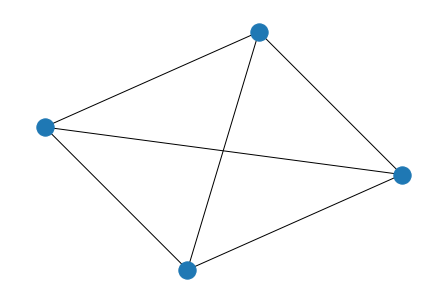

In [7]:
ansatz.draw_graph()

## Cut Size Distribution
The cut size distribution can be plotted using the `qaoa_anstaz.plot_cutsize_dist() ` 
method.

The empirically obtained distribution of cut sizes is stored in variables `qaoa_anstaz.dist_sizes` and `qaoa_anstaz.dist_sizes`.

In [8]:
# Accessing distribution of cut sizes corresponding to the ansatz
actual_maxcut = ansatz.optimal_cut
actual_maxcut_size = ansatz.optimal_size

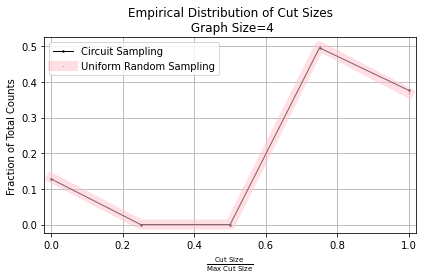

In [9]:
ansatz.plot_cutsize_dist()

## Metrics for quality assessment
Can be accessed from the QAOA_ansatz class after evaluation.
See the cell below for an example.

In [10]:
# Print all the metrics
print("The Approximation Ratio is {:.3f}".format(ansatz.approx_ratio))
print("The Gibbs Ratio is {:.3f}".format(ansatz.gibbs_ratio))
print("The CVaR Ratio is {:.3f}".format(ansatz.cvar_ratio))
print("The Best Cut Ratio is {:.3f}".format(ansatz.bestcut_ratio))

The Approximation Ratio is 0.748
The Gibbs Ratio is 0.818
The CVaR Ratio is 1.000
The Best Cut Ratio is 1.000


## Approximation Ratio Landscape
One can compute the approximation ratio over a grid of $\beta$ and $\gamma$ values.
Here, we demonstrate this for rounds=1, but this can easily by generalized to higher number of rounds by choosing a grid over more angles.
Note that $\beta\in [0,\pi)$ while $\gamma\in [0,2\pi)$ for un-weighted MaxCut problem.

In [11]:
def get_approx_ratio_for_angles(nodes, edges, betas, gammas, num_shots):
    ansatz = methods.qaoa_anstaz(nodes, edges, betas, gammas, num_shots = num_shots, optimal_cut = optimal_cut, optimal_size =optimal_size)
    ansatz.execute_circuit()
    return ansatz.approx_ratio
angles_to_ar = lambda betas, gammas: get_approx_ratio_for_angles(nodes, edges, betas, gammas, num_shots)

In [12]:
numpts = 50 # Along each axis, i.e. each parameter
_betas = np.linspace(0, np.pi, numpts)
_gammas = np.linspace(0, 2 * np.pi, numpts)
betas_arr, gammas_arr = np.meshgrid(_betas, _gammas)
ar_arr = np.zeros(betas_arr.shape)
for indx in range(numpts):
    for indy in range(numpts):
        betas = [betas_arr[indx, indy]]
        gammas = [gammas_arr[indx, indy]]
        ar_arr[indx, indy] = angles_to_ar(betas, gammas)

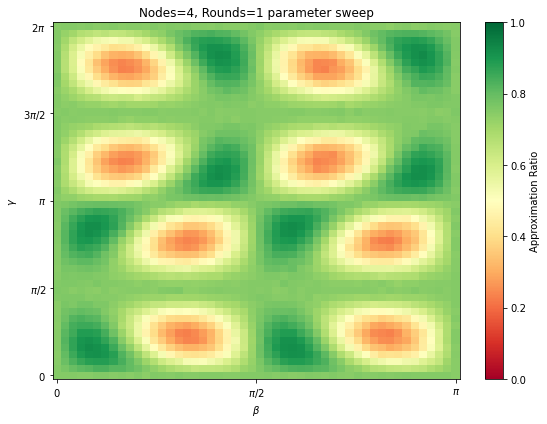

In [13]:
cmap = cm.get_cmap('RdYlGn')
fig, ax = plt.subplots(figsize=(8,6))
# Colormap from the parameter sweep
cc = ax.pcolor(betas_arr, gammas_arr, ar_arr, vmin = 0, vmax = 1, cmap=cmap)
cbar = plt.colorbar(cc); cbar.set_label("Approximation Ratio")
ax.set_title("Nodes={}, Rounds=1 parameter sweep".format(nodes))
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\gamma$")
_ = ax.set_xticks([0, np.pi/2, np.pi], labels=["$0$", r"$\pi/2$", r'$\pi$'])
_ = ax.set_yticks([0, np.pi/2, np.pi, np.pi*1.5, np.pi *2], labels=["$0$", r"$\pi/2$", r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
plt.tight_layout()
# plt.savefig("Sweep-Size={}-Rounds={}.png".format(nodes, 1), dpi=300)